In [219]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv', encoding='latin-1') # Try reading with 'latin-1' encoding
# If 'latin-1' does not work try 'utf-16', 'iso-8859-1', or other encodings.

In [221]:
df.shape

(15509, 10)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [223]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [224]:
df['Duration'].value_counts()

Duration
120 min    240
135 min    173
130 min    171
140 min    167
150 min    154
          ... 
201 min      1
206 min      1
198 min      1
218 min      1
250 min      1
Name: count, Length: 182, dtype: int64

In [225]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [226]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [227]:
#df.dropna(inplace=True)

In [228]:
df['Duration'] = df['Duration'].str.strip('min')

In [229]:
df['Duration'].head()

0     NaN
1    109 
2     90 
3    110 
4    105 
Name: Duration, dtype: object

In [230]:
df['Duration']=df['Duration'].fillna(0)
df['Duration'].value_counts()

Duration
0       8269
120      240
135      173
130      171
140      167
        ... 
321        1
218        1
198        1
300        1
250        1
Name: count, Length: 183, dtype: int64

In [231]:
df['Duration'] = df['Duration'].astype(int)
df['Duration']=df['Duration'].replace(0,df['Duration'].mean())

In [232]:
df['Duration'].value_counts()

Duration
59.812754     8269
120.000000     240
135.000000     173
130.000000     171
140.000000     167
              ... 
321.000000       1
218.000000       1
198.000000       1
300.000000       1
250.000000       1
Name: count, Length: 183, dtype: int64

In [233]:
df_new=df
df_new.drop('Year',inplace=True,axis='columns')

In [234]:
df_new.head()

,Name,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,59.812754,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,90.000000,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,105.000000,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [235]:
df_new.isnull().sum()

Name           0
Duration       0
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [236]:
df_new['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [237]:
df_new['Genre'].isnull().sum()

1877

In [238]:
df_new['Genre'].mode()

0    Drama
Name: Genre, dtype: object

In [239]:
df_new['Genre']=df_new['Genre'].fillna(df_new['Genre'].mode()[0])

In [240]:
df_new['Genre'].isnull().sum()

0

In [241]:
df_new['Rating'].value_counts()

Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64

In [242]:
df_new['Rating'].mean()

5.841621416845562

In [243]:
df_new['Rating'].mode()

0    6.2
Name: Rating, dtype: float64

In [244]:
df_new['Rating']=df_new['Rating'].fillna(df_new['Rating'].mean())

In [245]:
df_new['Rating'].value_counts()

Rating
5.841621     7590
6.200000      269
6.800000      264
6.500000      254
6.600000      239
             ... 
9.700000        1
1.400000        1
10.000000       1
9.600000        1
1.100000        1
Name: count, Length: 85, dtype: int64

In [246]:
df_new['Votes'].isnull().sum()

7589

In [247]:
df_new['Votes'].dtype

dtype('O')

In [248]:
df_new['Votes'].mode()

0    8
Name: Votes, dtype: object

In [249]:
df_new['Votes']=df_new['Votes'].fillna(df_new['Votes'].mode()[0])

In [250]:
df_new['Votes'].isnull().sum()

0

In [251]:
df_new['Director'].value_counts()

Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64

In [252]:
df_new['Director'].isnull().sum()

525

In [253]:
df_new['Director'].mode()

0    Jayant Desai
Name: Director, dtype: object

In [254]:
df_new['Director']=df_new['Director'].fillna(df_new['Director'].mode()[0])

In [255]:
df_new['Actor 1'].value_counts()

Actor 1
Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: count, Length: 4718, dtype: int64

In [256]:
df_new['Actor 2'].value_counts()

Actor 2
Rekha                 83
Hema Malini           72
Mithun Chakraborty    63
Dharmendra            61
Mala Sinha            48
                      ..
Paris Keswani          1
Shubhangi Latkar       1
Amit Ghosh             1
Ayushi Singh           1
Sarah Jane Dias        1
Name: count, Length: 4891, dtype: int64

In [257]:
df_new['Actor 3'].value_counts()

Actor 3
Pran             91
Shakti Kapoor    65
Anupam Kher      64
Jeevan           59
Prem Chopra      52
                 ..
Kayamali          1
Kirit Shah        1
Sanil Khosla      1
Anup Grover       1
Suparna Anand     1
Name: count, Length: 4820, dtype: int64

In [258]:
df_new.isnull().sum()

Name           0
Duration       0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [259]:
df_new.dropna(inplace=True)

In [260]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12365 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      12365 non-null  object 
 1   Duration  12365 non-null  float64
 2   Genre     12365 non-null  object 
 3   Rating    12365 non-null  float64
 4   Votes     12365 non-null  object 
 5   Director  12365 non-null  object 
 6   Actor 1   12365 non-null  object 
 7   Actor 2   12365 non-null  object 
 8   Actor 3   12365 non-null  object 
dtypes: float64(2), object(7)
memory usage: 966.0+ KB


In [261]:
df_new['Genre']=df_new['Genre'].str.split(',')
df_new=df_new.explode('Genre')

In [262]:
df_new.head()

,Name,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,59.812754,Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),109.000000,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,90.000000,Drama,5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Homecoming,90.000000,Musical,5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,110.000000,Comedy,4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [263]:
df_new['Genre']=df_new['Genre'].replace(' Drama','Drama')
df_new['Genre']=df_new['Genre'].replace(' Romance','Romance')
df_new['Genre']=df_new['Genre'].replace(' Crime','Crime')
df_new['Genre']=df_new['Genre'].replace(' Thriller','Thriller')
df_new['Genre']=df_new['Genre'].replace(' Family','Family')
df_new['Genre']=df_new['Genre'].replace(' Comedy','Comedy')
df_new['Genre']=df_new['Genre'].replace(' Musical','Musical')
df_new['Genre']=df_new['Genre'].replace(' Mystery','Mystery')
df_new['Genre']=df_new['Genre'].replace(' Adventure','Adventure')
df_new['Genre']=df_new['Genre'].replace(' Fantasy','Fantasy')
df_new['Genre']=df_new['Genre'].replace(' History','History')
df_new['Genre']=df_new['Genre'].replace(' Horror','Horror')
df_new['Genre']=df_new['Genre'].replace(' Music','Music')
df_new['Genre']=df_new['Genre'].replace(' Sport','Sport')
df_new['Genre']=df_new['Genre'].replace(' Action','Action')
df_new['Genre']=df_new['Genre'].replace(' Sci-Fi','Sci-Fi')
df_new['Genre']=df_new['Genre'].replace(' Biography','Biography')
df_new['Genre']=df_new['Genre'].replace(' War','War')
df_new['Genre']=df_new['Genre'].replace(' Western','Western')
df_new['Genre']=df_new['Genre'].replace(' News','News')
df_new['Genre']=df_new['Genre'].replace(' Reality-TV','Reality-TV')

In [264]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21425 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      21425 non-null  object 
 1   Duration  21425 non-null  float64
 2   Genre     21425 non-null  object 
 3   Rating    21425 non-null  float64
 4   Votes     21425 non-null  object 
 5   Director  21425 non-null  object 
 6   Actor 1   21425 non-null  object 
 7   Actor 2   21425 non-null  object 
 8   Actor 3   21425 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.6+ MB


In [265]:
df_new['Votes'] = df_new['Votes'].str.replace(',', '').str.replace('$', '').str.replace('M', '').str.replace('.','').astype(int)
# The .str.replace(',', '') removes the comma before converting to an integer.
#df_new['Votes'] = df_new['Votes'].str.replace(',', '').str.replace('M', '').astype(float).astype(int)

DATA VISUALISATION


In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
df_new.head()

,Name,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,59.812754,Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),109.000000,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,90.000000,Drama,5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Homecoming,90.000000,Musical,5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,110.000000,Comedy,4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


<Axes: ylabel='Duration'>

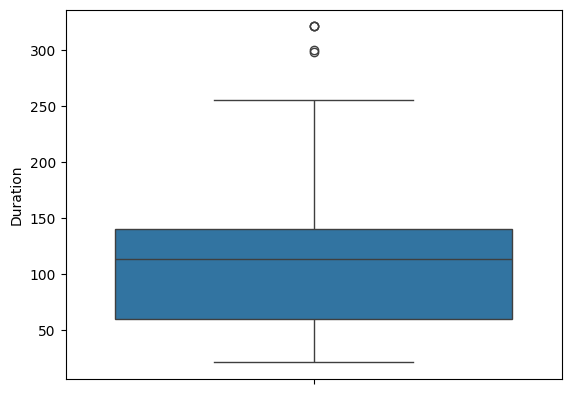

In [268]:
sns.boxplot(df_new['Duration'])

<Axes: xlabel='Duration', ylabel='Count'>

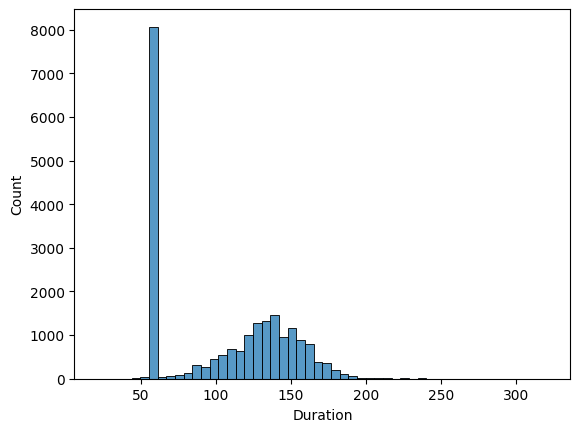

In [269]:
sns.histplot(df_new['Duration'])

<Axes: xlabel='Genre', ylabel='Rating'>

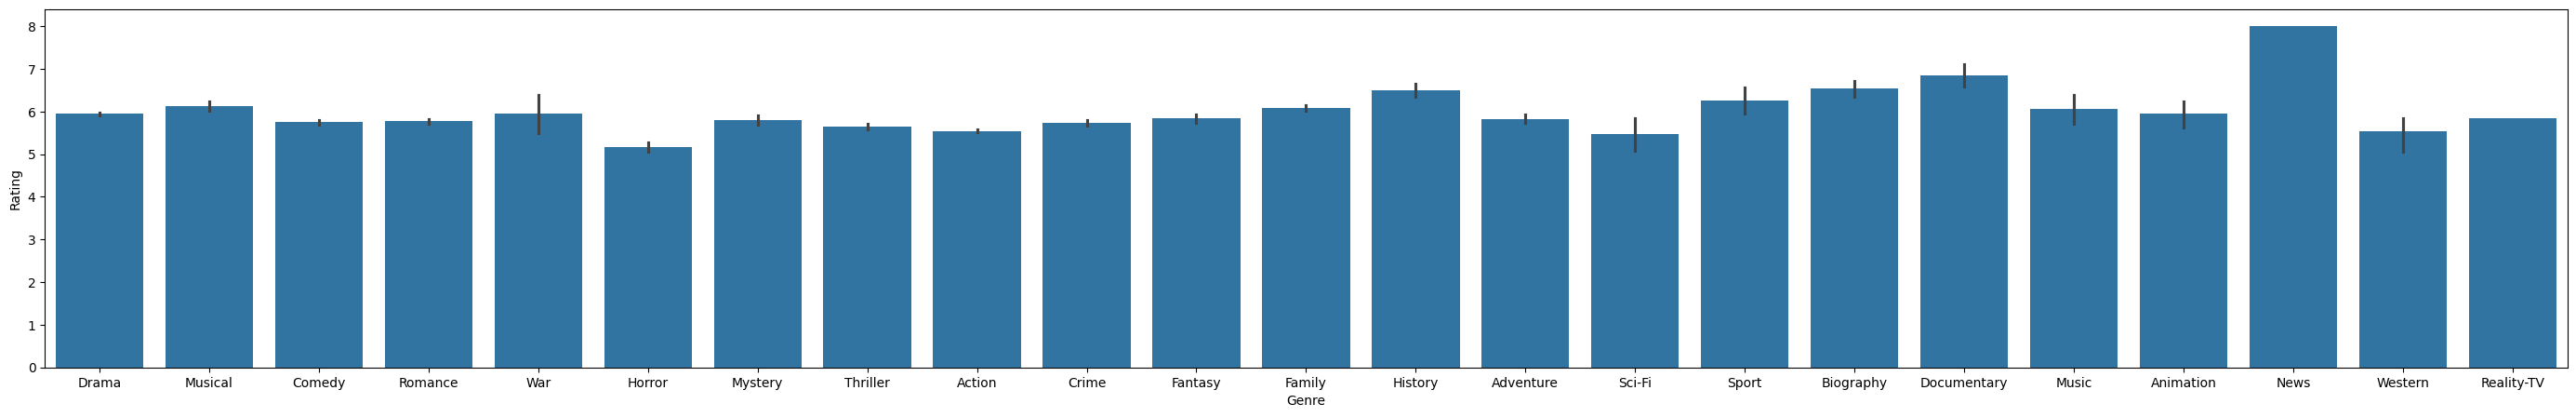

In [270]:
plt.figure(figsize=(35,5))
sns.barplot(x='Genre',y='Rating',data=df_new,)

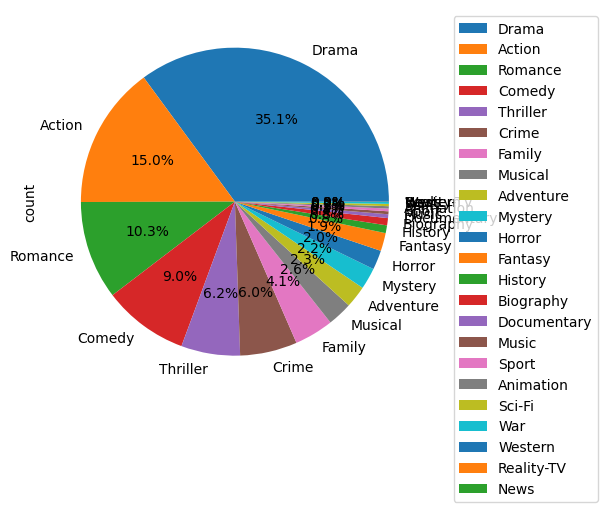

In [271]:
plt.figure(figsize=(5,5))
df_new['Genre'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: xlabel='count', ylabel='Genre'>

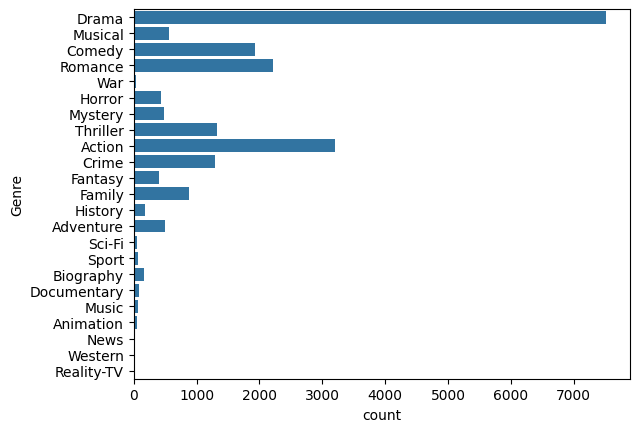

In [272]:
sns.countplot(df_new['Genre'])

<Axes: xlabel='Genre', ylabel='Rating'>

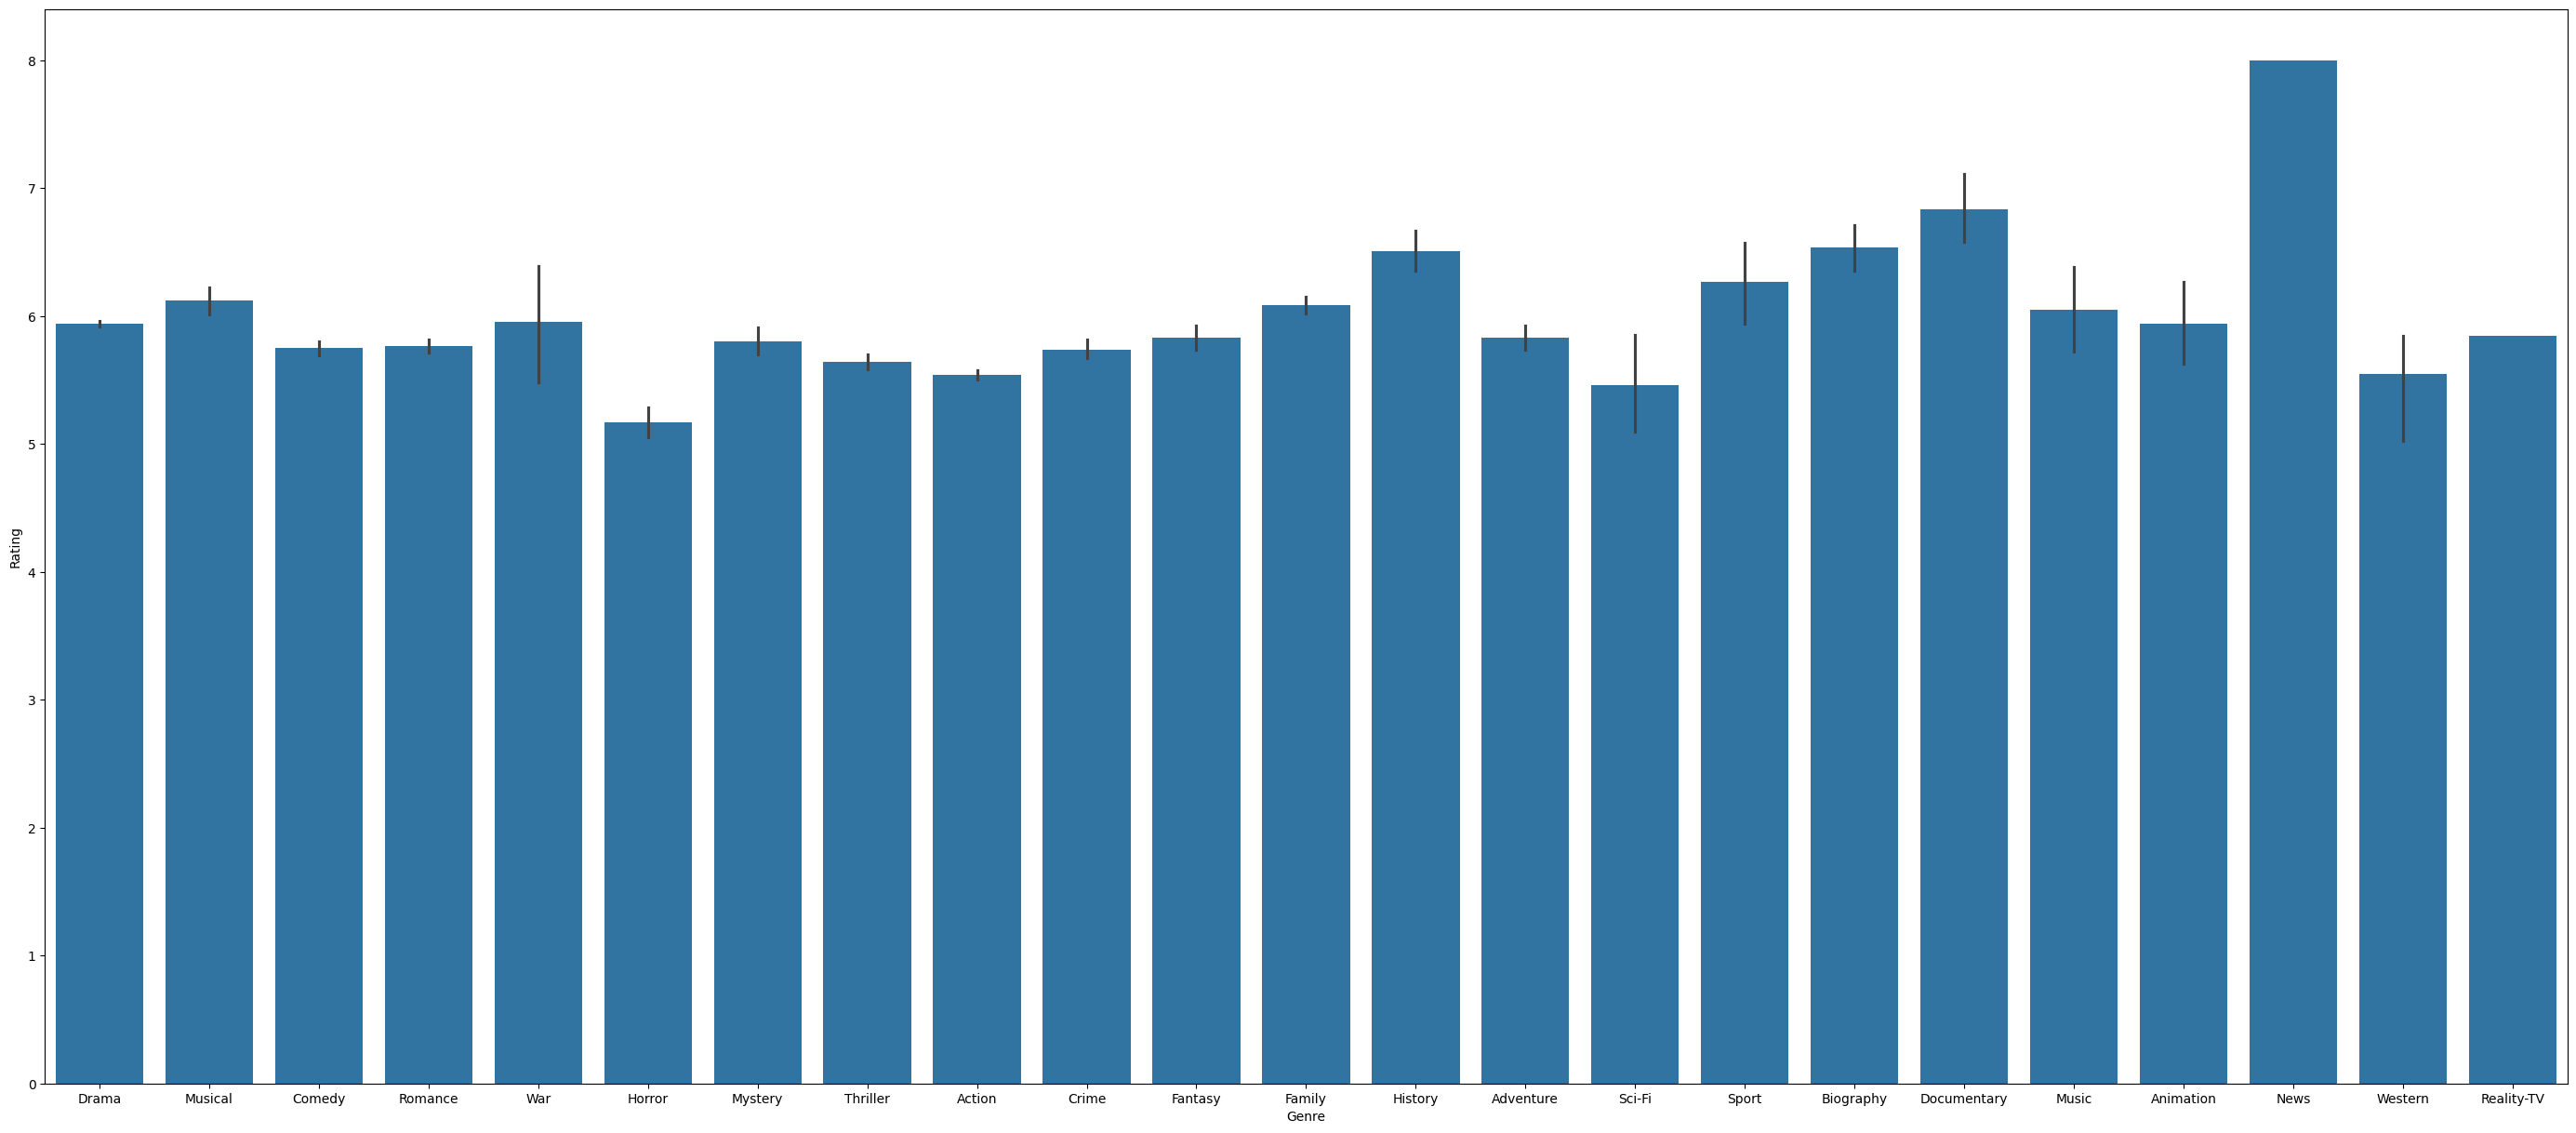

In [273]:
plt.figure(figsize=(35,15))
sns.barplot(x='Genre',y='Rating',data=df_new,)

<Axes: ylabel='Rating'>

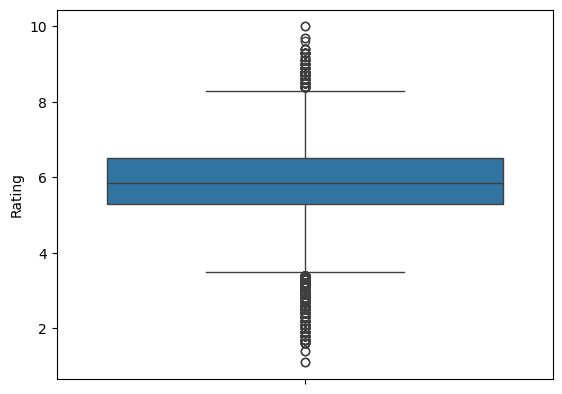

In [274]:
sns.boxplot(df_new['Rating'])

In [275]:
top_directors = df_new['Director'].value_counts().index[:10]
df_filtered = df_new[df_new['Director'].isin(top_directors)]

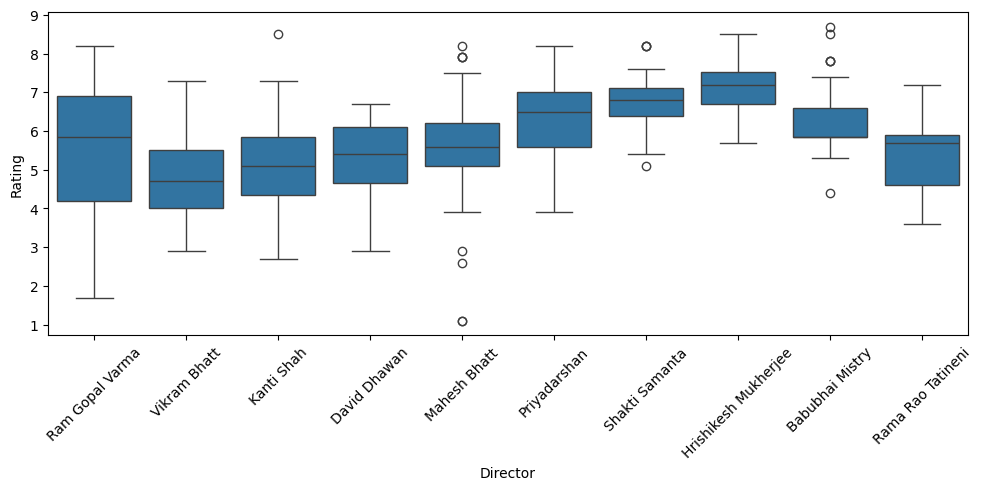

In [276]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Director', y='Rating', data=df_filtered)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [277]:
top_actors1 = df_new['Actor 1'].value_counts().index[:10]
df_filtered_actors1 = df_new[df_new['Actor 1'].isin(top_actors1)]

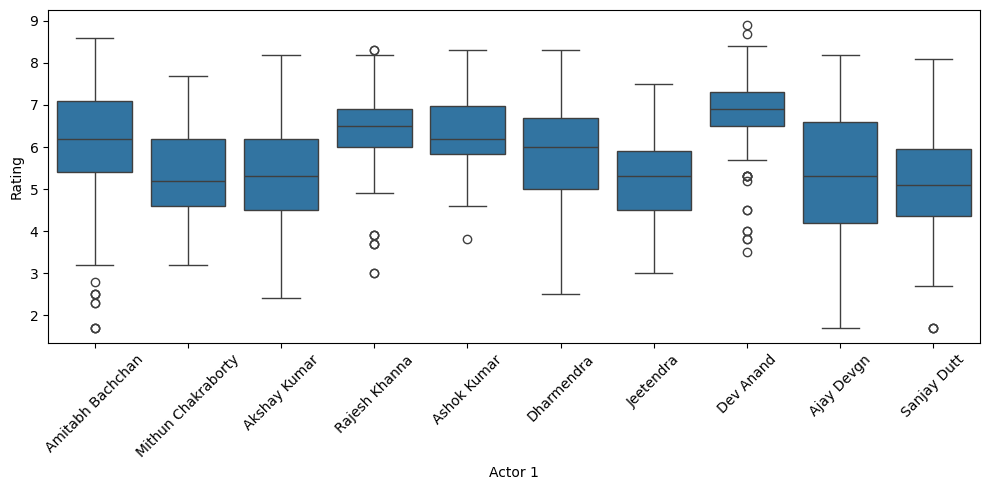

In [278]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Actor 1', y='Rating', data=df_filtered_actors1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [279]:
top_actors3 = df_new['Actor 3'].value_counts().index[:10]
df_filtered_actors3 = df_new[df_new['Actor 3'].isin(top_actors3)]

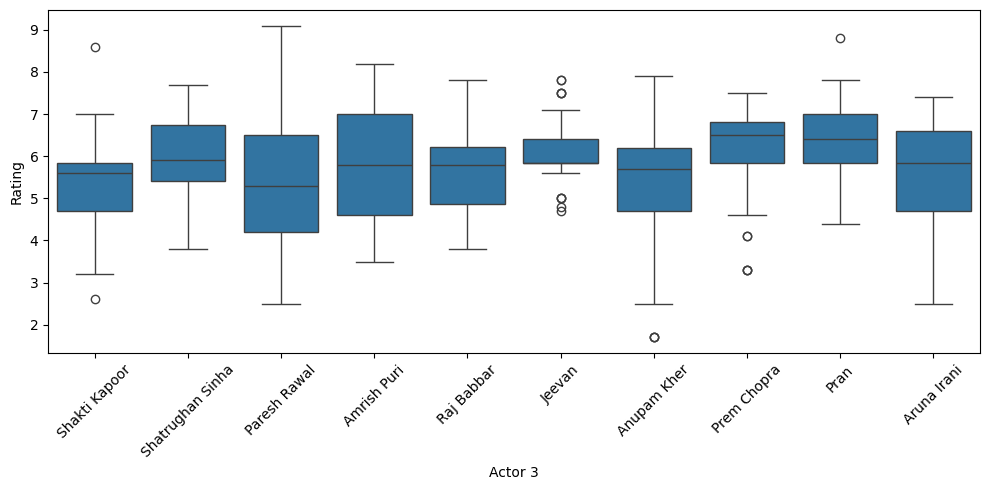

In [280]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Actor 3', y='Rating', data=df_filtered_actors3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

machine learning model

In [281]:
df_new.head()

,Name,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,59.812754,Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),109.000000,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,90.000000,Drama,5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Homecoming,90.000000,Musical,5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,110.000000,Comedy,4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [282]:
x=df_new[['Genre','Director','Actor 1','Actor 2','Actor 3']]

In [283]:
y=df_new['Rating']

In [284]:
from sklearn.model_selection import train_test_split

In [285]:
gnere_mean_rating=df_new.groupby('Genre')['Rating'].transform('mean') # grouping genre and rating and calculates mean
df_new['Genre_mean_rating']=gnere_mean_rating # creating new column with mean rating

director_mean_rating=df_new.groupby('Director')['Rating'].transform('mean') # grouping director and rating and calculates mean
df_new['Director_mean_rating']=director_mean_rating # creating new column with mean rating

actor1_mean_rating=df_new.groupby('Actor 1')['Rating'].transform('mean')
df_new['Actor 1_mean_rating']=actor1_mean_rating

actor2_mean_rating=df_new.groupby('Actor 2')['Rating'].transform('mean')
df_new['Actor 2_mean_rating']=actor2_mean_rating

actor3_mean_rating=df_new.groupby('Actor 3')['Rating'].transform('mean')
df_new['Actor 3_mean_rating']=actor3_mean_rating

In [286]:
x=df_new[['Genre_mean_rating','Director_mean_rating','Actor 1_mean_rating','Actor 2_mean_rating','Actor 3_mean_rating','Duration','Votes']]
y=df_new['Rating']

In [287]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [288]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [289]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.4002072772122528

In [290]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.44906523556314076

In [291]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7094696937311002